In [7]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.animation as animation
import random

<IPython.core.display.Javascript object>


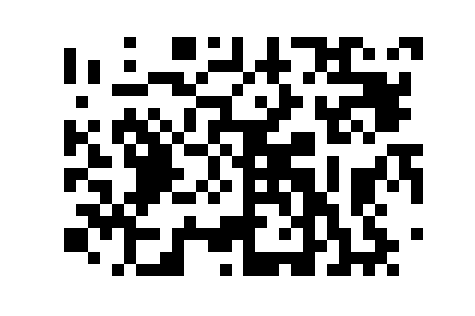

<IPython.core.display.Javascript object>


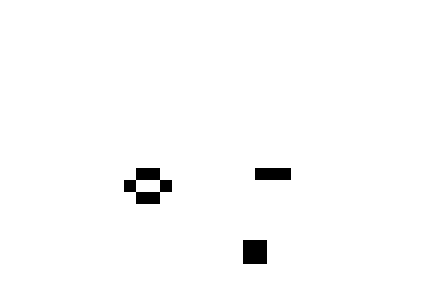

In [8]:
def init_universe(rows, cols):
    grid = np.zeros([rows, cols])
    for i in range(rows):
        for j in range(cols):
            grid[i][j] = round(random.random())
    return grid
grid = init_universe(20,30)
ax = plt.axes()
ax.matshow(grid,cmap=cm.binary)
ax.set_axis_off()
def evolve(grid, pars):
    overcrowd, underpop, reproduction = pars
    rows, cols = grid.shape
    newgrid = np.zeros([rows, cols])
    neighbors = np.zeros([rows,cols])
    # Auxiliary padded grid
    padboard = np.zeros([rows+2, cols+2])
    padboard[:-2,:-2] = grid
    # Compute neighbours and newgrid
    for i in range(rows):
        for j in range(cols):
            neighbors[i][j] += sum([padboard[a][b] for a in [i-1, i, i+1] \
                                    for b in [j-1, j, j+1]])
            neighbors[i][j] -= padboard[i][j]
            # Evolution logic
            newgrid[i][j] = grid[i][j]
            if grid[i][j] and \
               (neighbors[i][j] > overcrowd or neighbors[i][j] < underpop):
                newgrid[i][j] = 0
            elif not grid[i][j] and neighbors[i][j] == reproduction:
                newgrid[i][j] = 1
    return newgrid
pars = 3, 2, 3
rows, cols = 20, 20
fig = plt.figure()
ax = plt.axes()
im = ax.matshow(init_universe(rows,cols),cmap=cm.binary)
ax.set_axis_off()
 
def init():
    im.set_data(init_universe(rows, cols))
 


In [9]:
def animate(i):
    a = im.get_array()
    a = evolve(a, pars)
    im.set_array(a)
    return [im]

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)
 
anim.save('animation_random.mp4', fps=10) # fps = FramesPerSecond

In [11]:
def init_universe_glider_gun():
    glider_gun = 38*'0' + 25*'0'+'1'+12*'0' + 23*'0'+'101'+12*'0' +\
             13*'0'+'11'+6*'0'+'11'+12*'0'+'11'+'0' +\
             12*'0'+'1'+3*'0'+'1'+4*'0'+'11'+12*'0'+'11'+'0' +\
             '0'+'11'+8*'0'+'1'+5*'0'+'100011'+15*'0' +\
             '0'+'11'+8*'0'+'1'+'000'+'1011'+4*'0'+'101'+12*'0' +\
             11*'0'+'1000001'+7*'0'+'1'+12*'0' +\
             12*'0'+'10001'+21*'0' + 13*'0'+'11'+23*'0' + 38*'0' +\
             19*38*'0'
    grid = np.array([float(g) for g in glider_gun]).reshape(30,38)
    return grid

In [12]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)
 
anim.save('animation_random.mp4', fps=10) # fps = FramesPerSeco